# クラスタリング色々

- KMeans
- KMedoids

In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
# -1〜+1の間に規格化
def normalize(score):
    norm = (score-score.min())/(score.max()-score.min()) # 0-1に規格化
    norm = norm * 2
    norm = norm - np.mean(norm, axis=0)
    return norm

In [13]:
# 分類されたクラスタを表示
def show_cluster(kmeans, suptitle, title, n_row=3, n_col=3):
    center = kmeans.cluster_centers_.copy()
    plt.figure(figsize=(15, 10))
    plt.suptitle(suptitle, fontsize=25)
    for i in np.arange(len(center)):
        ax = plt.subplot(n_row, n_col, i+1)
        ax.set_title(f'{title}:{i+1}', fontsize=20)
        ax.plot(center[i])
    plt.tight_layout()
    plt.show()

In [5]:
# 位相整列の実装(指導教員から提供された関数)
def alignment(x):
    fft = np.fft.fft(x)
    fft_phase = np.angle(fft)
    fft_abs = np.abs(fft)[:-1] # -1はあったほうが良さそう。
    disp = fft_phase[np.argmax(fft_abs)] * len(x) / (2 * np.pi)
    disp = int(- disp) % len(x)
    return np.tile(x, 2)[disp:disp+len(x)]

In [6]:
# 使うデータは1036冊分の小説データの感情スコア値
SCORE_PATH = 'data/all_score_1124.csv'

In [7]:
# pandas dataframeとして読み込む
score_df = pd.read_csv(SCORE_PATH, index_col=0)
score_df.head()

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
13,0.025661,0.000000,0.054238,0.066828,0.170504,0.276141,0.331507,0.199721,0.145354,0.078378,...,0.730720,0.769252,0.744509,0.796472,0.747293,0.633655,0.644652,0.587357,0.710778,1.000000
19,0.582563,0.548885,0.555228,0.577744,0.582888,0.640445,0.639444,0.669647,0.633042,0.589699,...,0.581338,0.537401,0.493915,0.504167,0.462203,0.416233,0.410606,0.407270,0.372276,0.337727
24,0.558150,0.573397,0.559897,0.556415,0.527930,0.403733,0.370236,0.465665,0.523025,0.457648,...,0.028671,0.000000,0.009338,0.099273,0.117307,0.078283,0.066041,0.078662,0.093908,0.292288
30,0.630050,0.571001,0.543094,0.548430,0.484186,0.561365,0.504428,0.539505,0.428540,0.503674,...,0.265228,0.422052,0.512738,0.577317,0.593348,0.557535,0.642939,0.603872,0.603872,0.551362
41,0.911461,1.000000,0.947067,0.883412,0.842882,0.885247,0.841734,0.750502,0.746091,0.763377,...,0.377716,0.371480,0.431062,0.443728,0.395934,0.444922,0.424034,0.525714,0.572375,0.650717


In [8]:
scores = score_df.to_numpy()

In [9]:
# 平均値を０にしておく(-1〜1の間に規格化)
A = normalize(scores)
A.shape, np.min(A), np.max(A), np.mean(A)

((1149, 100), -1.1089616051194453, 1.1042975547265899, -1.9479631137026246e-17)

In [10]:
# アライメント実行
A_alignment = []
for a in A:
    A_alignment.append(alignment(a))
A_alignment = np.array(A_alignment)

## KMeans

### Before Alignment

In [11]:
km = KMeans(n_clusters=9, random_state=0, n_init='auto').fit(A)
km.labels_

array([0, 3, 7, ..., 3, 2, 2], dtype=int32)

In [12]:
km.cluster_centers_.shape

(9, 100)

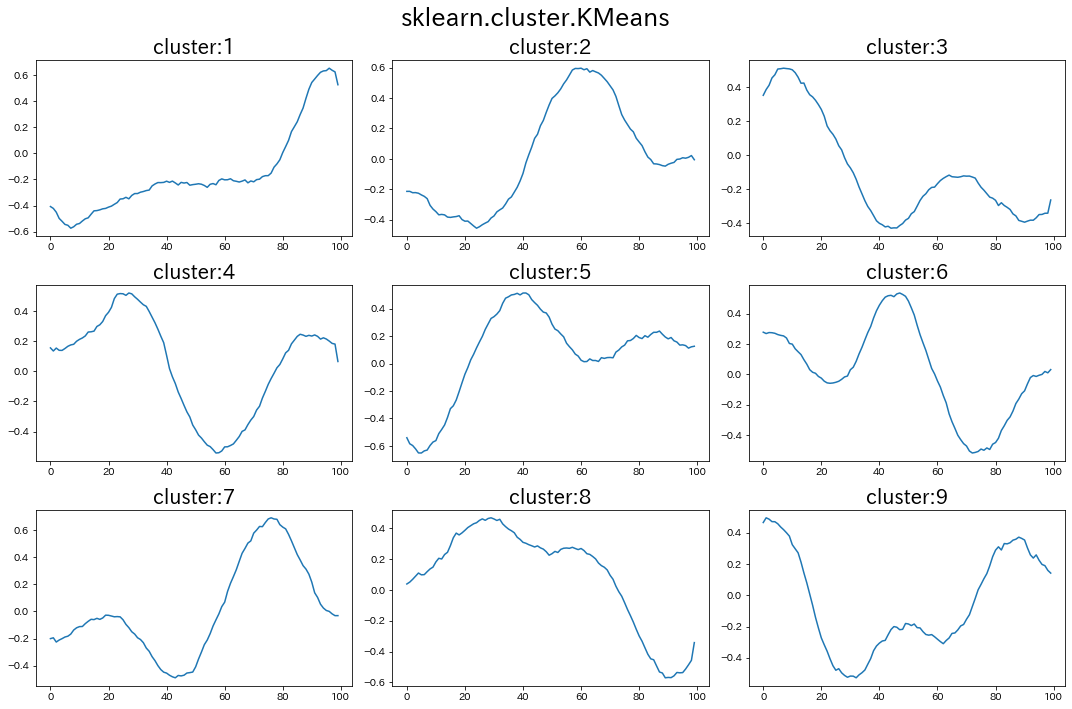

In [15]:
suptitle = 'sklearn.cluster.KMeans'
show_cluster(km, suptitle, 'cluster')

### After Alignment

In [14]:
km2 = KMeans(n_clusters=9, random_state=0, n_init='auto').fit(A_alignment)
km2.labels_

array([8, 7, 0, ..., 1, 0, 5], dtype=int32)

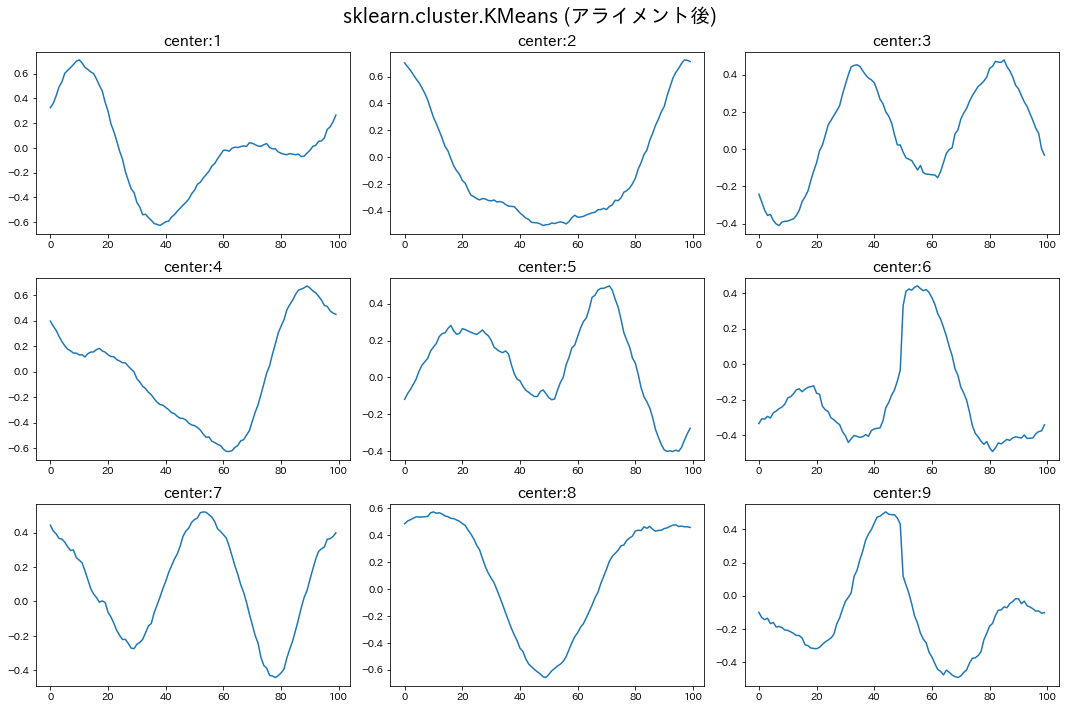

In [15]:
suptitle = 'sklearn.cluster.KMeans (アライメント後)'
show_cluster(km2, suptitle, 'center')

## k-medoids

https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html

In [11]:
from sklearn_extra.cluster import KMedoids

In [12]:
kmedoids = KMedoids(n_clusters=9, random_state=0)
kmedoids.fit(A)

KMedoids(n_clusters=9, random_state=0)

In [13]:
kmedoids.cluster_centers_.shape

(9, 100)

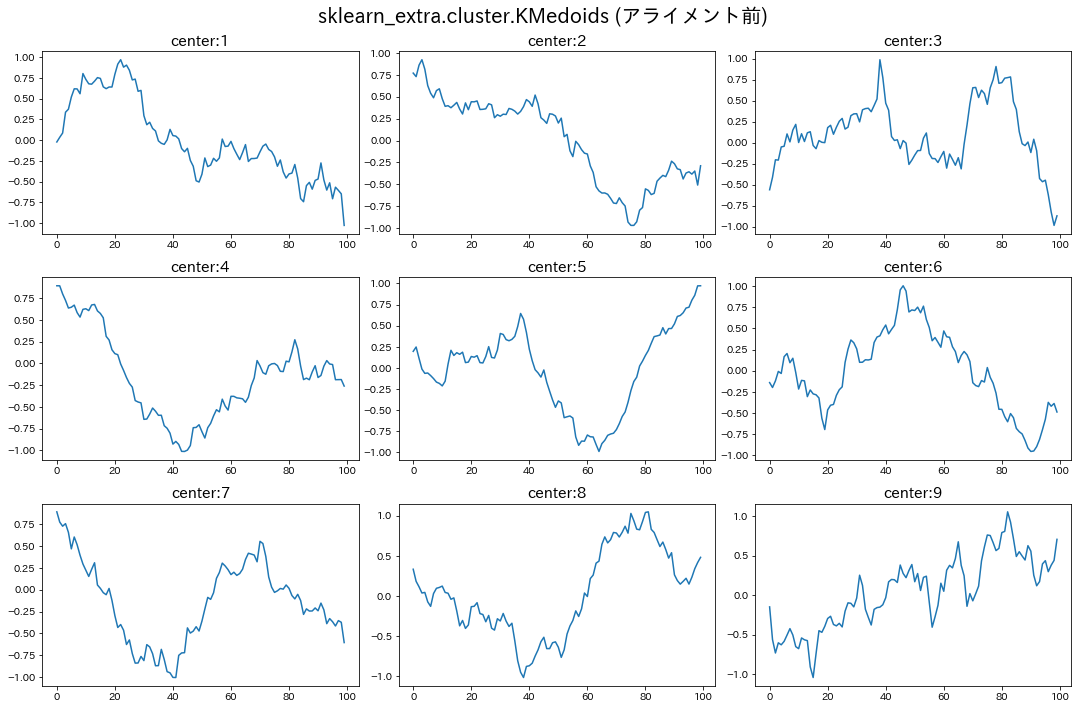

In [14]:
suptitle = 'sklearn_extra.cluster.KMedoids (アライメント前)'
show_cluster(kmedoids, suptitle, 'center')

### エルボー法

In [18]:
distances = []
for n in range(1, 11):
    print(f'n_clusters={n}')
    kmedoids = KMedoids(n_clusters=n, random_state=0)
    kmedoids.fit(A)
    distances.append(kmedoids.inertia_)

n_clusters=1
n_clusters=2
n_clusters=3
n_clusters=4
n_clusters=5
n_clusters=6
n_clusters=7
n_clusters=8
n_clusters=9
n_clusters=10


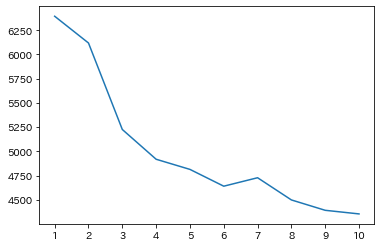

In [24]:
plt.plot(distances)
plt.xticks([x for x in range(10)], [x for x in range(1, 11)])
plt.show()

## クラスタ数:6

In [25]:
kmedoids6 = KMedoids(n_clusters=6, random_state=0)
kmedoids6.fit(A)

KMedoids(n_clusters=6, random_state=0)

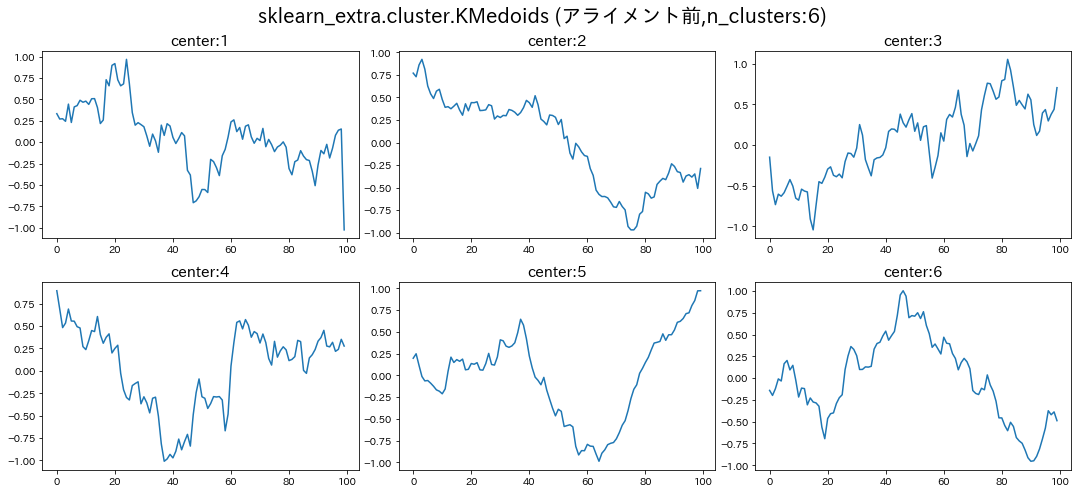

In [26]:
suptitle = 'sklearn_extra.cluster.KMedoids (アライメント前,n_clusters:6)'
show_cluster(kmedoids6, suptitle, 'center')

In [27]:
kmedoids6.medoid_indices_

array([670, 794, 263, 130, 306, 438])

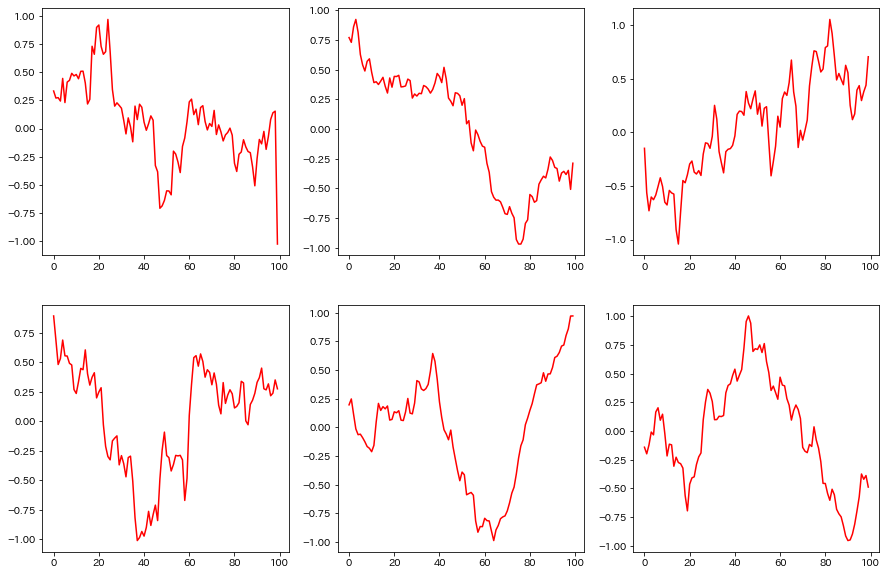

In [34]:
plt.figure(figsize=(15, 10))
for i, id in enumerate(kmedoids6.medoid_indices_):
    plt.subplot(2, 3, i+1)
    plt.plot(A[id], c='red')

## クラスタ数:9

In [15]:
kmedoids2 = KMedoids(n_clusters=9, random_state=0)
kmedoids2.fit(A_alignment)

KMedoids(n_clusters=9, random_state=0)

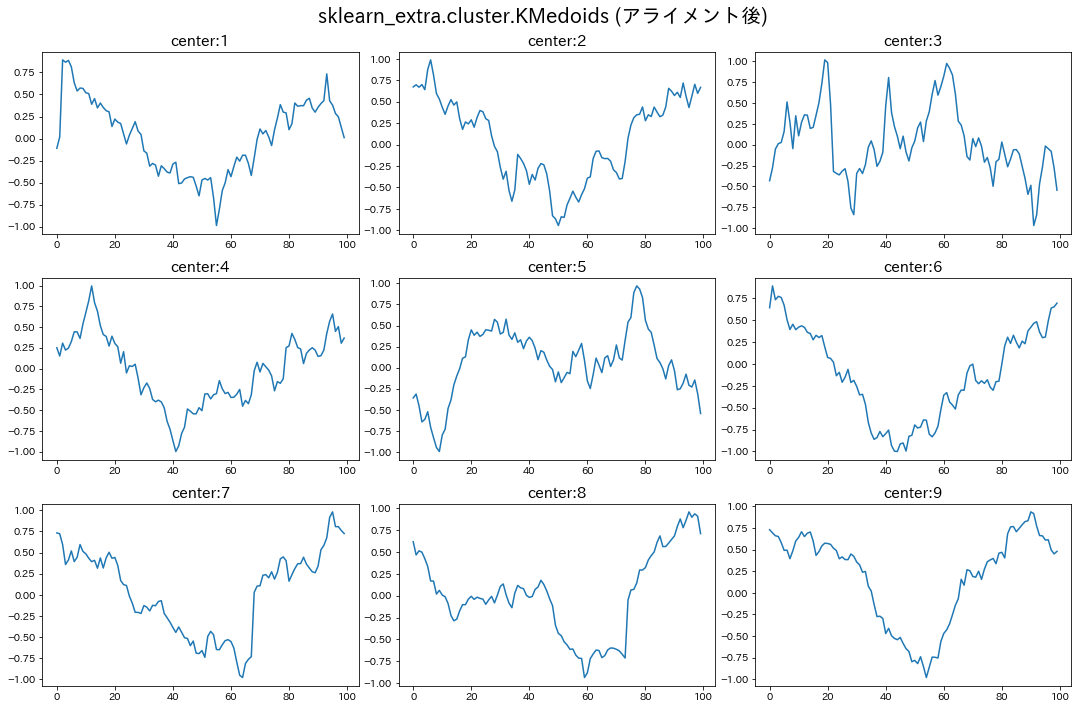

In [16]:
suptitle = 'sklearn_extra.cluster.KMedoids (アライメント後)'
show_cluster(kmedoids2, suptitle, 'center')

In [18]:
kmedoids2.inertia_

4038.353469010366